In [1]:
%run func_def.ipynb

**imports loaded.

> Pre-Processing func:
    get_striking_efficiency(name, date)
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_c

In [2]:
loc = '../data/'
file = 'data_features.csv'
df = pd.read_csv(loc+file)

try:
    df = df.drop(['str_dif.1'], axis=1)
except:
    pass

df.date = pd.to_datetime(df.date)
print('Data Frame loaded: '+str(df.shape))
df.tail(3)

Data Frame loaded: (6394, 23)


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6391,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188
6392,win,Elise Reed,Jinh Yu Frey,2023-06-03,Women's Strawweight,U-DEC,Unanimous,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188
6393,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188


In [3]:
df.describe()

,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
count,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03,6394.000000,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03,6394.000000,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03
mean,-2.702818e-16,-1.034865e-17,-2.729413e-16,2.970203e-16,-3.995127e-17,8.473394e-18,0.002409,-5.132654e-17,1.870050e-17,9.793021e-18,1.330913e-17,-0.000397,-1.257622e-12,2.856902e-17,-5.879660e-16,-3.785246e-17
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.033382,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,0.028086,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-6.725136e+00,-1.150276e+01,-6.283984e+00,-6.035334e+00,-6.726048e+00,-3.453236e+00,-11.800000,-5.935204e+00,-6.882020e+00,-1.275779e+01,-6.288054e+00,-0.500000,-6.520323e+00,-2.473447e+00,-8.900257e+00,-6.139058e+00
25%,4.209788e-03,-4.990063e-01,-3.897531e-01,-8.752130e-03,-5.812031e-01,-5.859783e-01,-0.500000,-6.411935e-01,-5.181327e-01,-5.626786e-01,-5.428736e-01,-0.004830,2.322520e-01,-4.935748e-01,-5.476934e-01,-1.818838e-02
50%,4.209788e-03,-2.058233e-02,3.195705e-03,-8.752130e-03,1.884361e-03,1.291261e-03,0.000000,4.876559e-03,-2.224539e-02,5.122903e-03,-2.058443e-02,0.000000,2.322520e-01,1.393404e-03,9.144190e-03,-1.818838e-02
75%,4.209788e-03,4.946435e-01,3.961445e-01,-8.752130e-03,5.681520e-01,5.885609e-01,0.400000,6.321290e-01,5.562898e-01,5.713472e-01,5.017047e-01,0.004240,2.322520e-01,5.211100e-01,5.659818e-01,-1.818838e-02
max,6.733555e+00,6.603750e+00,7.862171e+00,8.600651e+00,6.258861e+00,3.455818e+00,15.400000,1.199794e+01,5.763107e+00,5.519107e+00,5.463452e+00,0.493330,9.734725e+00,2.476234e+00,6.691195e+00,6.102681e+00


In [4]:
features = df.columns[7:]
len(features)
print(features)

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'str_efc_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif',
       'lose_strk_dif'],
      dtype='object')


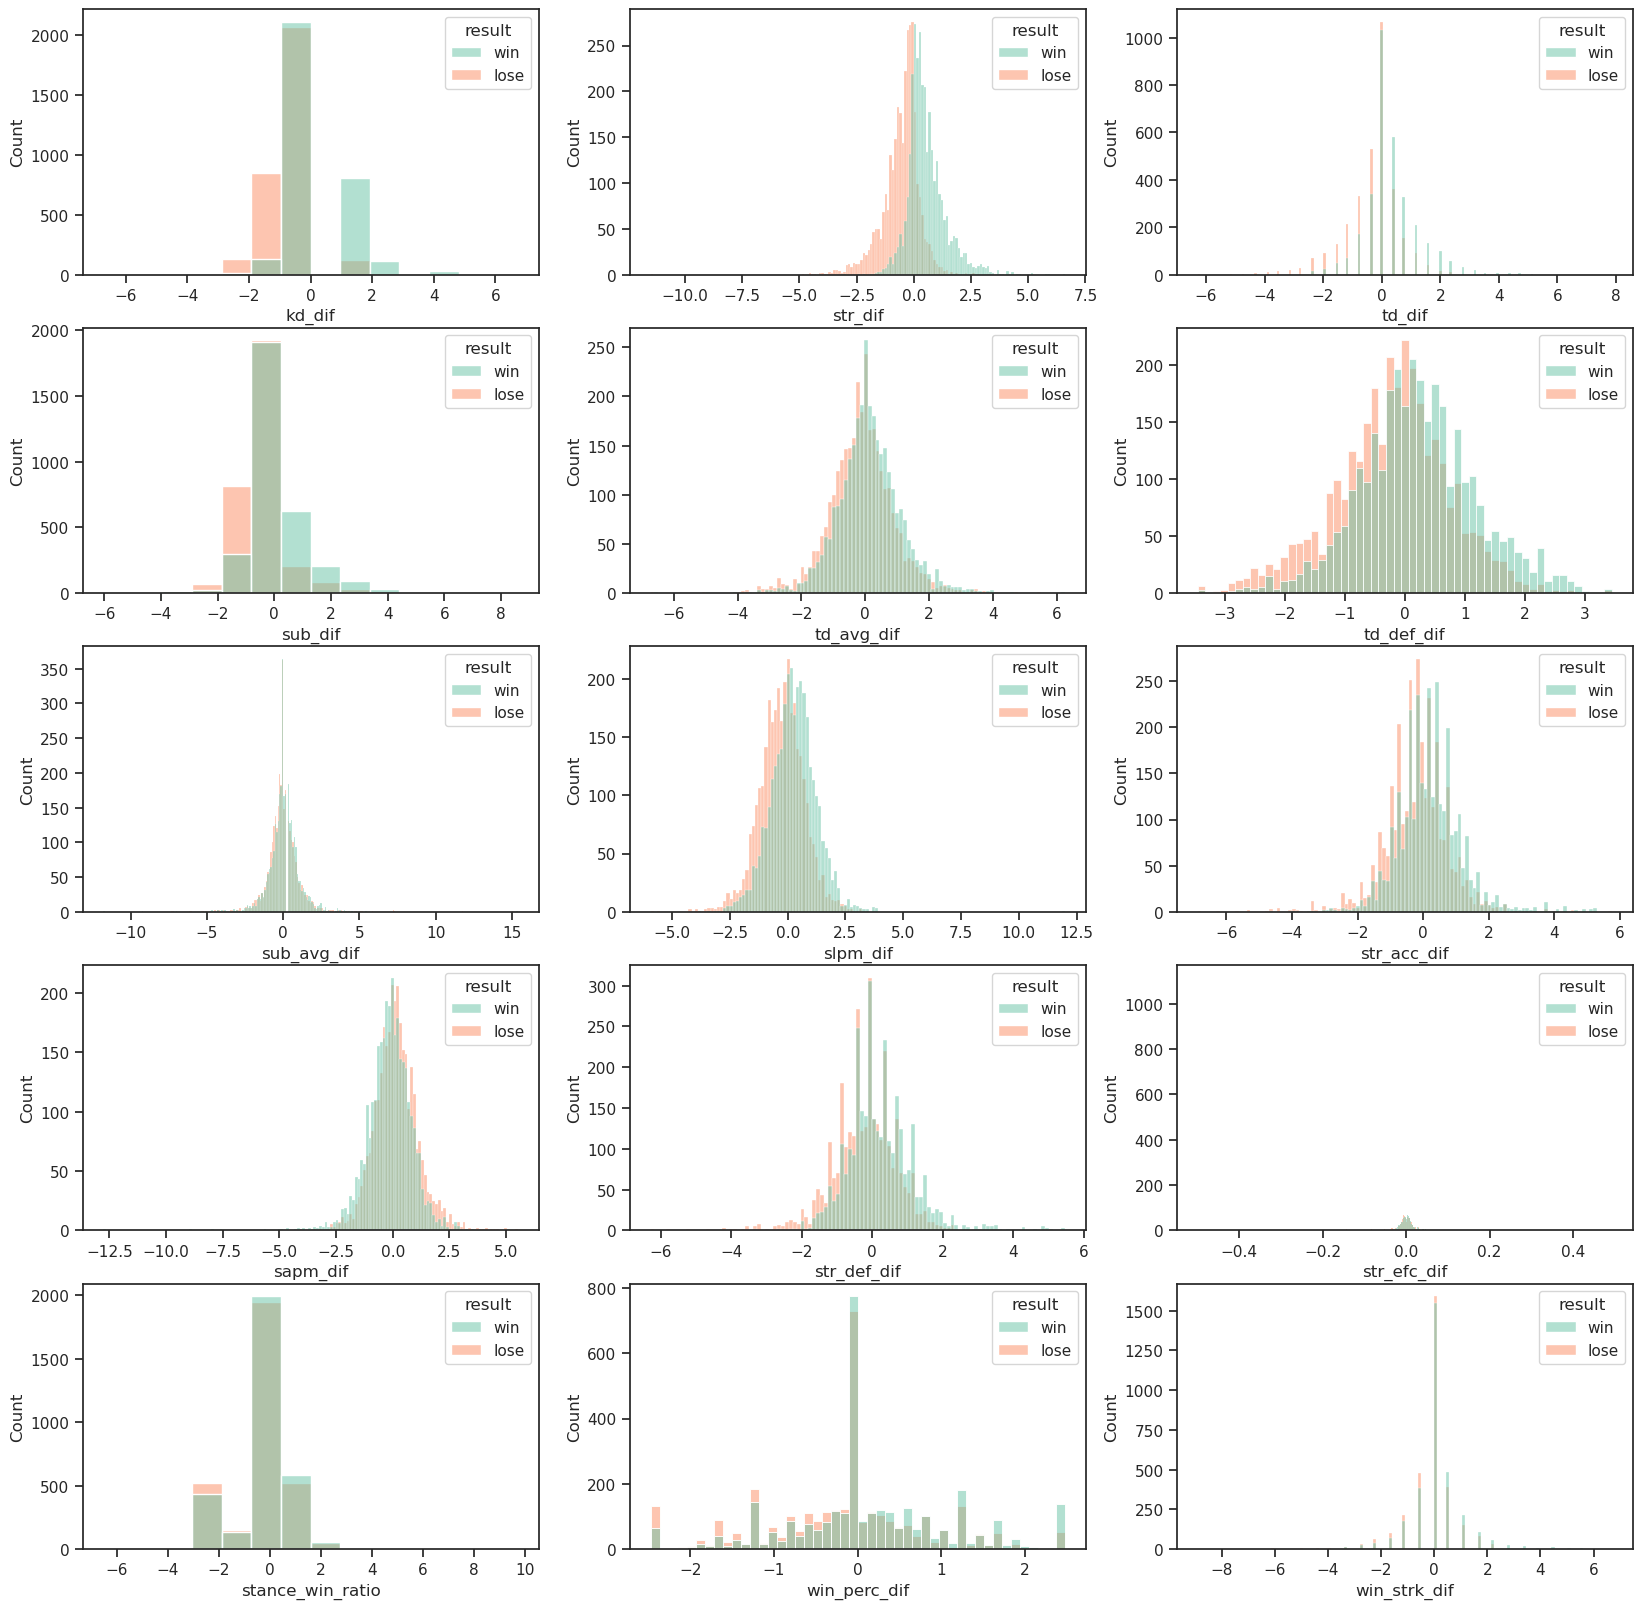

In [5]:
rows=5
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))

i = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(ax=axs[row,col], x=features[i], data=df, hue='result')
        i += 1

In [6]:
X = features # prediction model features
data = df.copy()
data['outlier'] = False

for feature in X:
    ucl = np.mean(df[feature]) + 3*np.std(df[feature])
    lcl = np.mean(df[feature]) - 3*np.std(df[feature])
    
    inlier_list = df.index[(df[feature] > ucl)|(df[feature] < lcl)]
    data.loc[inlier_list,'outlier'] = True
    print('1d Outliers at %s: %s' %(feature,len(inlier_list)))

data.head(3)       

1d Outliers at kd_dif: 56
1d Outliers at str_dif: 87
1d Outliers at td_dif: 109
1d Outliers at sub_dif: 117
1d Outliers at td_avg_dif: 81
1d Outliers at td_def_dif: 25
1d Outliers at sub_avg_dif: 93
1d Outliers at slpm_dif: 44
1d Outliers at str_acc_dif: 108
1d Outliers at sapm_dif: 63
1d Outliers at str_def_dif: 116
1d Outliers at str_efc_dif: 100
1d Outliers at stance_win_ratio: 15
1d Outliers at win_perc_dif: 0
1d Outliers at win_strk_dif: 118
1d Outliers at lose_strk_dif: 192


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier
0,win,Max Holloway,Arnold Allen,2023-04-15,Featherweight,U-DEC,Unanimous,0.004210,2.592349,0.003196,-0.008752,-0.469071,0.277653,0.0,2.382163,0.556290,1.222742,-0.194681,-0.00454,-1.880897,-0.666814,-5.559232,1.001957,True
1,win,Edson Barboza,Billy Quarantillo,2023-04-15,Featherweight,KO/TKO,Knee,1.350079,0.053021,0.003196,-0.008752,-0.631663,0.588561,-1.1,-2.435135,-1.179316,-1.048464,1.546283,0.00814,0.232252,-0.295587,-0.547693,2.022101,False
2,win,Azamat Murzakanov,Dustin Jacoby,2023-04-15,Light Heavyweight,U-DEC,Unanimous,1.350079,0.089823,0.003196,-0.008752,0.198116,0.795832,0.0,-0.559651,0.804233,-0.568988,-0.107633,0.00399,1.159339,0.496362,0.565982,-1.038333,False


<AxesSubplot:xlabel='str_efc_dif', ylabel='str_dif'>

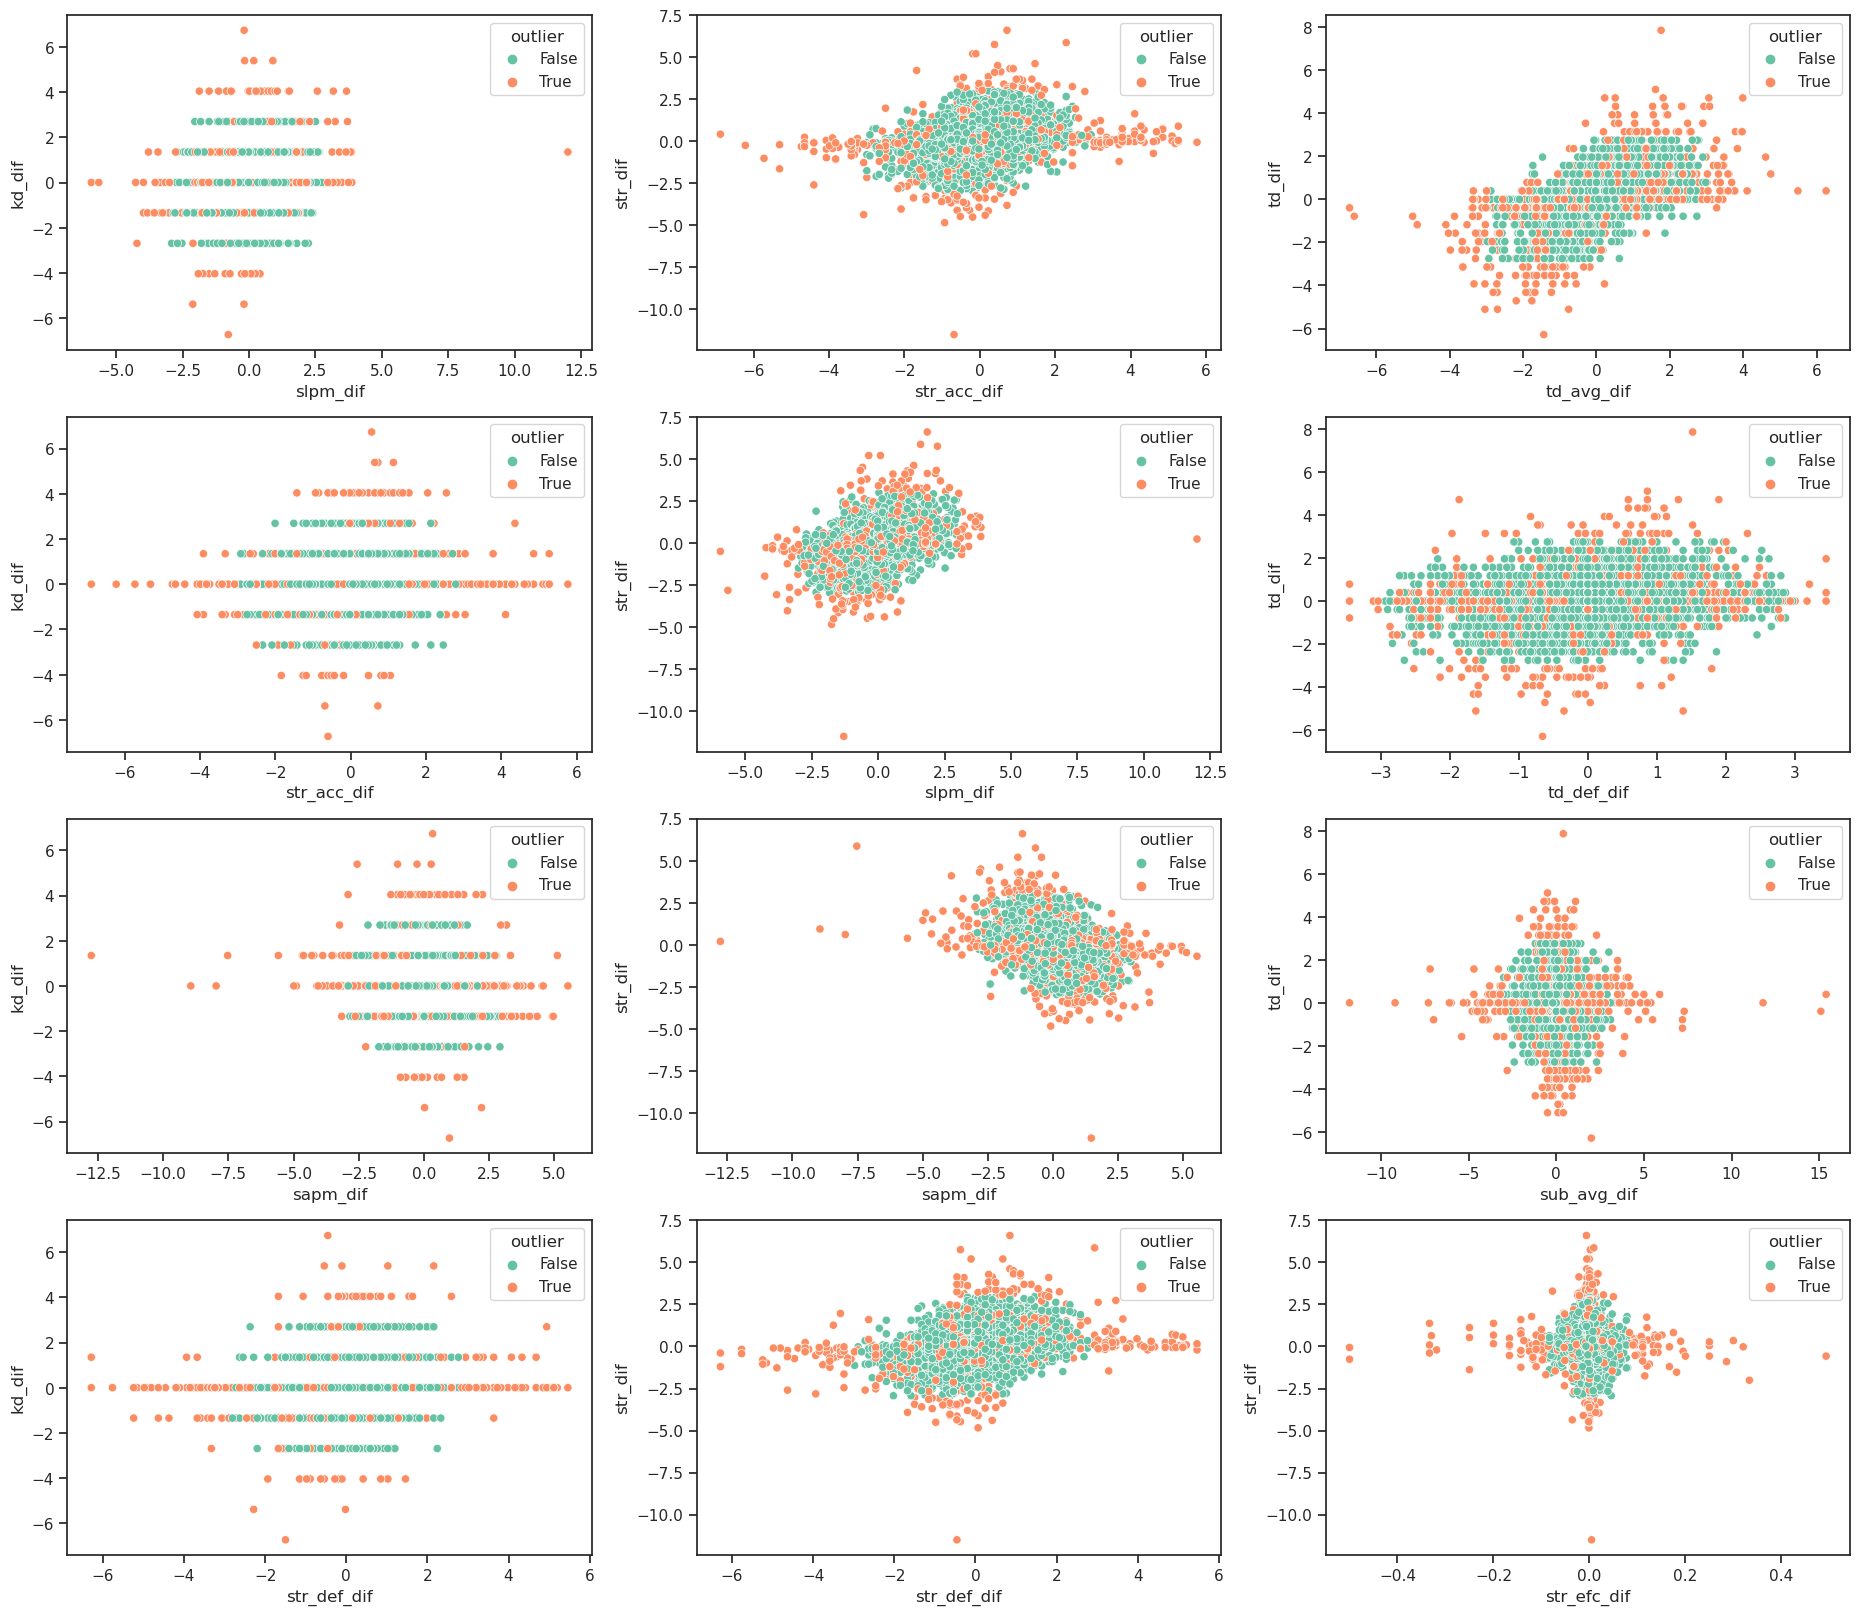

In [7]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,2], x='str_efc_dif', y='str_dif', data=data, hue='outlier')

## Train Local Outlier Factor model: 
LOF model detect outliers based on data points density, a point with lower density will be counted as an outlier

In [8]:
X

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'str_efc_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif',
       'lose_strk_dif'],
      dtype='object')

In [9]:
lof = set_outlier_detection_model(X_columns=X, data=data, n=20, contemination=0.05)
lof

LocalOutlierFactor(contamination=0.05, n_jobs=-1)

In [10]:
data['lof_inlier'] = lof.fit_predict(data[X])
lof_outliers = data.index[data.lof_inlier == -1]
data['lof_outlier'] = False
data.loc[lof_outliers, 'lof_outlier'] = True
data = data.drop(['lof_inlier'], axis=1)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6391,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188,False,False
6392,win,Elise Reed,Jinh Yu Frey,2023-06-03,Women's Strawweight,U-DEC,Unanimous,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188,False,False
6393,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188,False,False


<AxesSubplot:xlabel='str_efc_dif', ylabel='str_dif'>

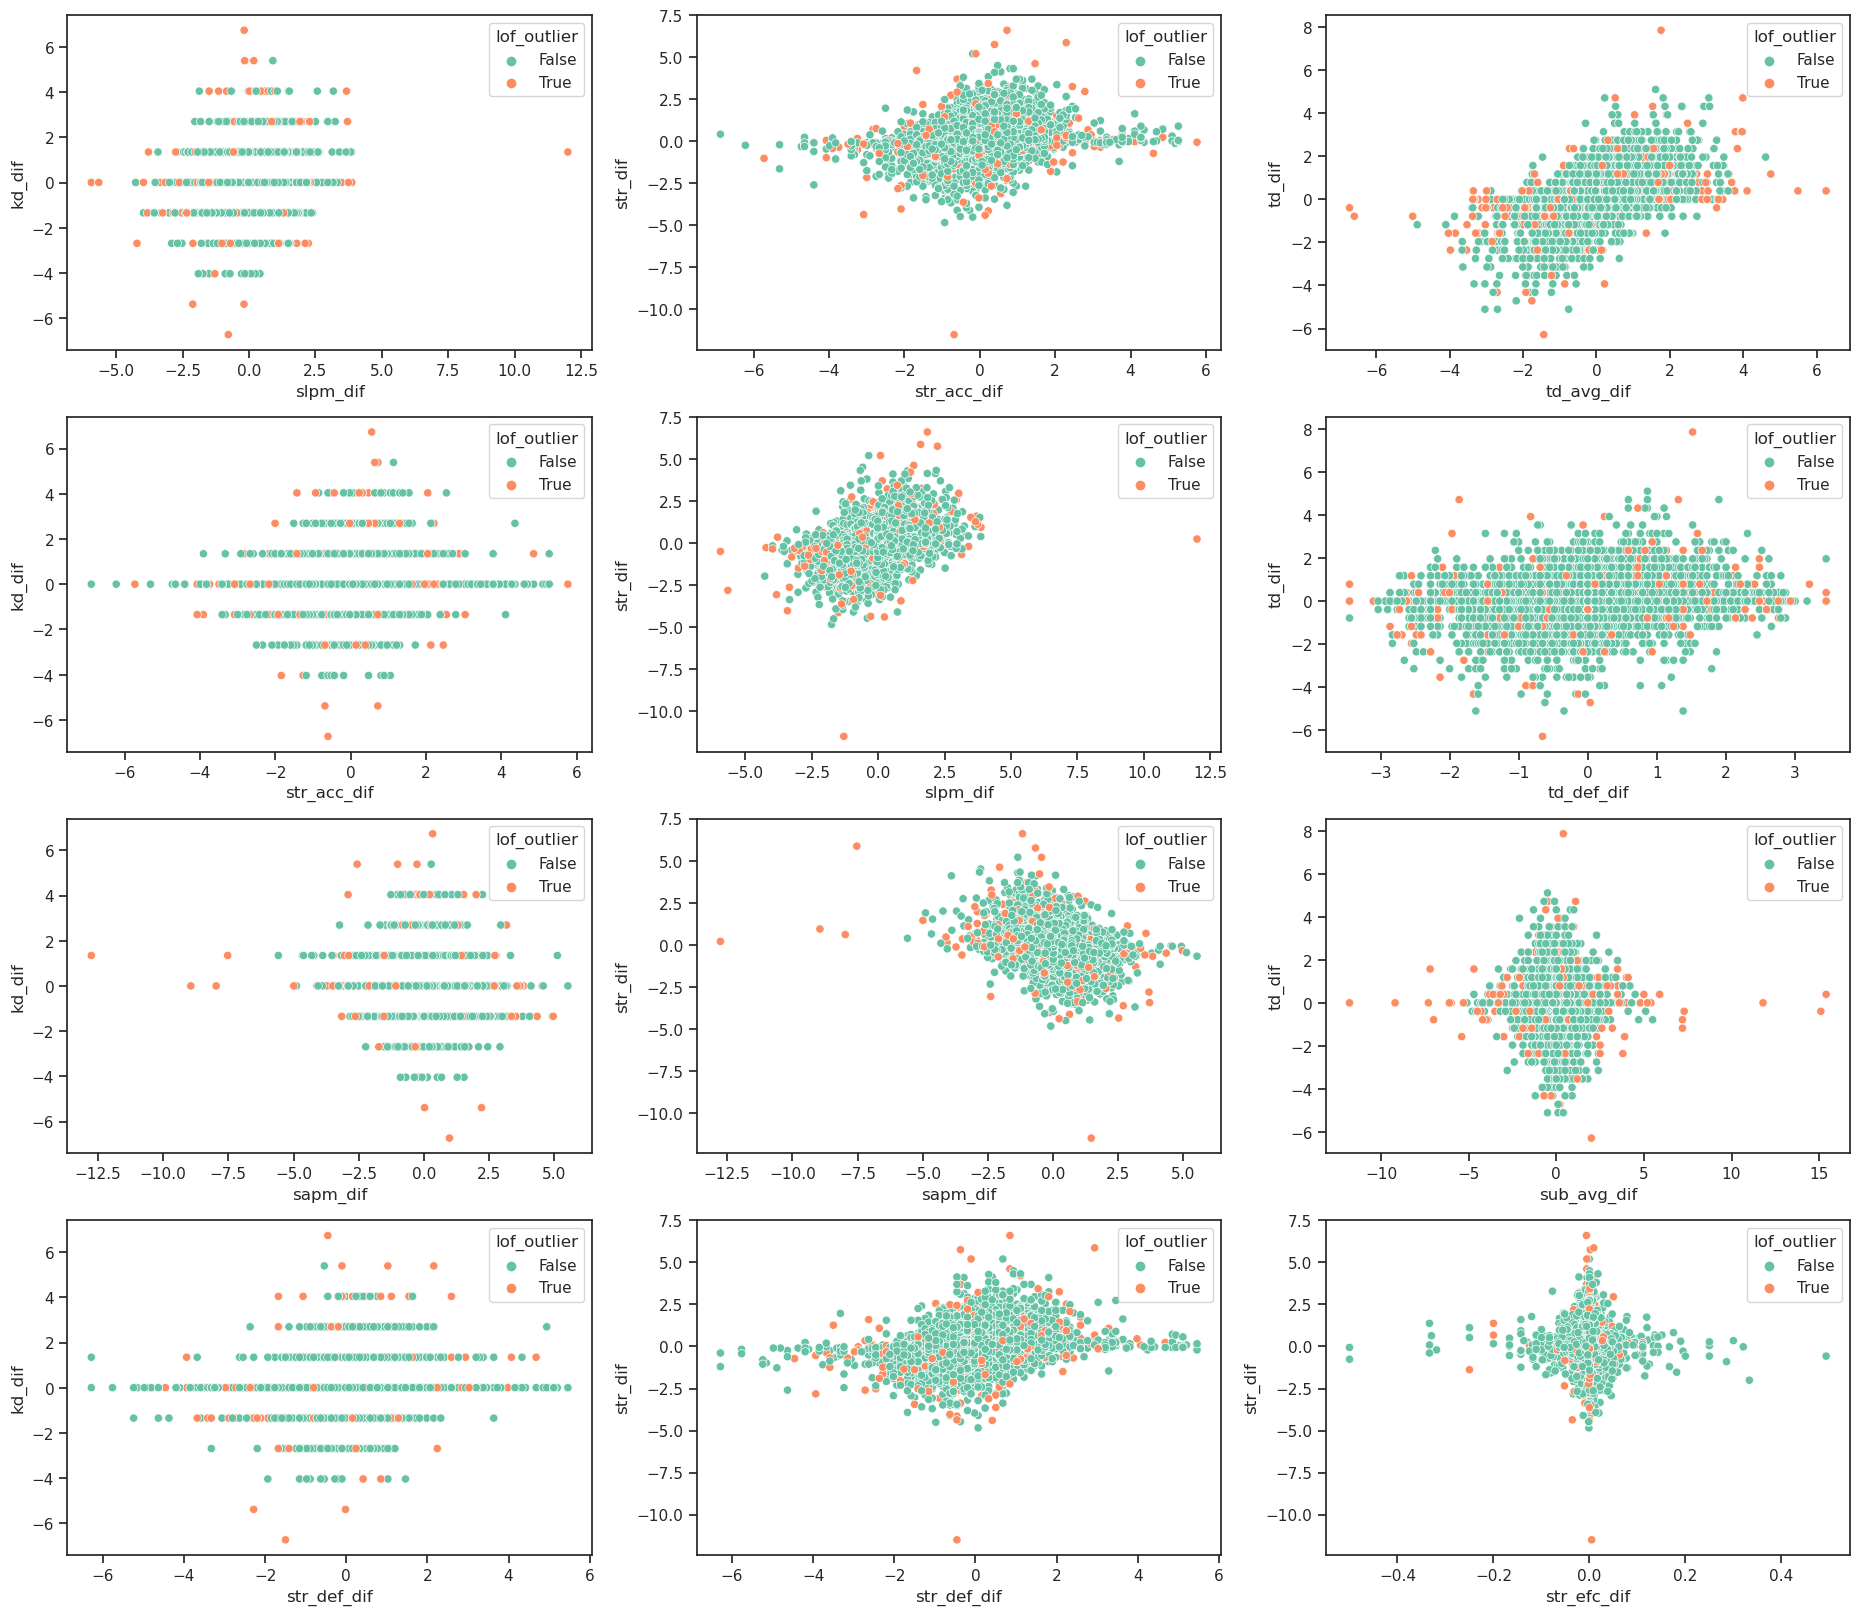

In [11]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,2], x='str_efc_dif', y='str_dif', data=data, hue='lof_outlier')

In [12]:
try:
    data.to_csv('../data/data_features_outliers_detected.csv', index=None)
    print('../data/data_features_outliers_detected.csv saved.')
except:
    print('error occurs saving ../data/data_features_outliers_detected.csv - might be file in use.')

../data/data_features_outliers_detected.csv saved.
